In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ulda import ulda, ulda_feature_reduction

In [3]:
df = pd.read_csv('_features.csv', index_col=0)
df

,class,subject,muscles,WL_imf1,WL_imf2,WL_imf3,WL_imf4,WL_imf5,WL_imf6,WL_imf7,...,MFD_imf4,MFD_imf5,MIF_imf1,MIF_imf2,MIF_imf3,MIF_imf4,MIF_imf6,PPSD_imf1,PPSD_imf4,PPSD_imf8
0,ALS,N2001A04DE02,Deltoideus,256595.552872,3.783618e+05,257253.890500,119511.968760,42117.699637,11645.060550,3902.568140,...,-4.328030,-10.910114,-1.226242,-6.189853e-12,1.406243e-11,2.392291e-11,-1.245585e-12,6.238782,6.269340,6.280803
1,ALS,N2001A05DE59,Deltoideus,247564.650914,3.269455e+05,224211.847535,101229.704790,37305.438820,11943.200363,4454.753254,...,44.684659,-222.526487,-768.755620,1.327668e-11,1.218517e-11,6.235975e-12,-9.977700e-12,6.247444,6.270208,6.281241
2,ALS,N2001A04DE01,Deltoideus,540181.546891,8.586722e+05,579867.514846,292206.771279,102446.384934,36210.647420,14591.495106,...,34.028262,-210.581217,-175.342043,6.434687e-11,-2.782520e-10,4.181294e-11,3.760728e-11,6.249058,6.272712,6.281020
3,ALS,N2001A04DE05,Deltoideus,341897.101592,5.274620e+05,399872.585801,188202.161491,80692.664374,33347.578223,13727.248474,...,-326.146615,10.604508,16.159057,-8.214755e-11,-1.043228e-10,-1.574287e-11,-1.485099e-11,6.256112,6.271826,6.280888
4,ALS,N2001A04DE06,Deltoideus,221365.924984,4.266873e+05,338803.247041,175226.887956,59234.548709,17447.567161,7678.216211,...,-56.992075,-18.411712,204.521163,2.354861e-11,-6.169052e-11,3.317484e-12,-3.493752e-11,6.261384,6.269926,6.281548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,HealthyControls,N2001C03BB52,BicepsBrachii_long_head,899883.663958,1.222609e+06,822114.135197,394621.175190,129604.934484,34410.231955,11475.831650,...,-20.892302,-63.127769,-113.095370,-7.737630e-13,-6.616717e-11,1.362092e-11,-1.945747e-12,6.240537,6.265656,6.280660
913,HealthyControls,N2001C03BB56,BicepsBrachii_long_head,639894.964180,6.820947e+05,492629.786187,214074.107277,73577.568226,22965.053798,7567.843791,...,14.225643,8.761746,-65.857738,1.759954e-11,6.002920e-12,5.166458e-12,-9.080259e-12,6.247217,6.265693,6.280811
914,HealthyControls,N2001C07BB71,BicepsBrachii_long_head,82458.301008,1.028802e+05,83565.186564,57811.136987,21228.488011,5417.059955,1897.495461,...,-3.943490,-14.218056,1.592966,1.382383e-12,-5.131228e-13,-4.146854e-13,-1.187114e-12,6.239827,6.270602,6.280861
915,HealthyControls,N2001C10BB70,BicepsBrachii_long_head,351521.984376,4.971413e+05,313834.698329,137713.506665,51591.572293,12498.388728,4199.298345,...,-23.978793,-64.048461,19.364123,7.739944e-13,5.522231e-12,-5.902844e-12,3.733862e-12,6.244805,6.268570,6.280758


In [4]:
df_clean = df.dropna(how='any')

data_classes = pd.factorize(df_clean['class'])[0]
data_feat = np.array(df_clean[df_clean.columns[3:]])
data_feat = (data_feat - np.mean(data_feat, axis=0)) / np.std(data_feat, axis=0)
df_clean

,class,subject,muscles,WL_imf1,WL_imf2,WL_imf3,WL_imf4,WL_imf5,WL_imf6,WL_imf7,...,MFD_imf4,MFD_imf5,MIF_imf1,MIF_imf2,MIF_imf3,MIF_imf4,MIF_imf6,PPSD_imf1,PPSD_imf4,PPSD_imf8
0,ALS,N2001A04DE02,Deltoideus,256595.552872,3.783618e+05,257253.890500,119511.968760,42117.699637,11645.060550,3902.568140,...,-4.328030,-10.910114,-1.226242,-6.189853e-12,1.406243e-11,2.392291e-11,-1.245585e-12,6.238782,6.269340,6.280803
1,ALS,N2001A05DE59,Deltoideus,247564.650914,3.269455e+05,224211.847535,101229.704790,37305.438820,11943.200363,4454.753254,...,44.684659,-222.526487,-768.755620,1.327668e-11,1.218517e-11,6.235975e-12,-9.977700e-12,6.247444,6.270208,6.281241
2,ALS,N2001A04DE01,Deltoideus,540181.546891,8.586722e+05,579867.514846,292206.771279,102446.384934,36210.647420,14591.495106,...,34.028262,-210.581217,-175.342043,6.434687e-11,-2.782520e-10,4.181294e-11,3.760728e-11,6.249058,6.272712,6.281020
3,ALS,N2001A04DE05,Deltoideus,341897.101592,5.274620e+05,399872.585801,188202.161491,80692.664374,33347.578223,13727.248474,...,-326.146615,10.604508,16.159057,-8.214755e-11,-1.043228e-10,-1.574287e-11,-1.485099e-11,6.256112,6.271826,6.280888
4,ALS,N2001A04DE06,Deltoideus,221365.924984,4.266873e+05,338803.247041,175226.887956,59234.548709,17447.567161,7678.216211,...,-56.992075,-18.411712,204.521163,2.354861e-11,-6.169052e-11,3.317484e-12,-3.493752e-11,6.261384,6.269926,6.281548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,HealthyControls,N2001C03BB52,BicepsBrachii_long_head,899883.663958,1.222609e+06,822114.135197,394621.175190,129604.934484,34410.231955,11475.831650,...,-20.892302,-63.127769,-113.095370,-7.737630e-13,-6.616717e-11,1.362092e-11,-1.945747e-12,6.240537,6.265656,6.280660
913,HealthyControls,N2001C03BB56,BicepsBrachii_long_head,639894.964180,6.820947e+05,492629.786187,214074.107277,73577.568226,22965.053798,7567.843791,...,14.225643,8.761746,-65.857738,1.759954e-11,6.002920e-12,5.166458e-12,-9.080259e-12,6.247217,6.265693,6.280811
914,HealthyControls,N2001C07BB71,BicepsBrachii_long_head,82458.301008,1.028802e+05,83565.186564,57811.136987,21228.488011,5417.059955,1897.495461,...,-3.943490,-14.218056,1.592966,1.382383e-12,-5.131228e-13,-4.146854e-13,-1.187114e-12,6.239827,6.270602,6.280861
915,HealthyControls,N2001C10BB70,BicepsBrachii_long_head,351521.984376,4.971413e+05,313834.698329,137713.506665,51591.572293,12498.388728,4199.298345,...,-23.978793,-64.048461,19.364123,7.739944e-13,5.522231e-12,-5.902844e-12,3.733862e-12,6.244805,6.268570,6.280758


In [5]:
red_feat = ulda_feature_reduction(data_feat, data_classes, 2)
nfeat = (red_feat - np.mean(red_feat, axis=0)) / np.std(red_feat, axis=0)

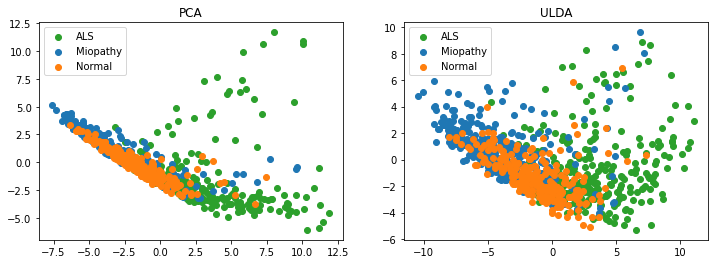

In [39]:
def legend_without_duplicate_labels(ax):
  hand, labl = ax.get_legend_handles_labels()
  handout = []
  lablout = []
  for h, l in zip(hand, labl):
    if l not in lablout:
      lablout.append(l)
      handout.append(h)
  ax.legend(handout, lablout)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

colors = ['tab:green', 'tab:blue', 'tab:orange']
labels = ['ALS', 'Miopathy', 'Normal']

# PCA plot
U1, D1, V1 = np.linalg.svd(data_feat)

for i in range(data_feat.shape[0]):
  pc0 = V1[0, :] @ data_feat[i, :].T
  pc1 = V1[1, :] @ data_feat[i, :].T
  
  if np.abs(pc0) >= 12 or np.abs(pc1) >= 12: continue
  
  ax[0].scatter(pc0, pc1, c=colors[data_classes[i]], label=labels[data_classes[i]])
  ax[0].set_title('PCA')

# ULDA plot
for i, data in enumerate(red_feat):
  if np.abs(data[0]) >= 12 or np.abs(data[1]) >= 12: continue
  ax[1].scatter(data[0], data[1], c=colors[data_classes[i]], label=labels[data_classes[i]])
  ax[1].set_title('ULDA')
    
legend_without_duplicate_labels(ax[0])
legend_without_duplicate_labels(ax[1])
fig.savefig('fig/reduction.png')

In [31]:
np.unique(ax[0].get_legend_handles_labels()[1])

array(['ALS', 'Miopathy', 'Normal'], dtype='<U8')

In [26]:
red_feat

array([[-1.58079414,  0.29337268],
       [ 0.94745901,  3.13319137],
       [ 1.81469168, -0.32402257],
       ...,
       [-2.09643597,  1.85508489],
       [ 0.16055098,  2.12800751],
       [-1.82518844,  0.6481856 ]])